In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("sales_2019.csv")

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19


In [4]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Zip Code
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,63877.518935
std,51512.737110,0.442793,332.731330,37776.308300
min,141234.000000,1.000000,2.990000,2215.000000
25%,185831.250000,1.000000,11.950000,10001.000000
50%,230367.500000,1.000000,14.950000,90001.000000
75%,275035.750000,1.000000,150.000000,94016.000000
max,319670.000000,9.000000,1700.000000,98101.000000


In [5]:
df = df.dropna()

In [6]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Zip Code
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,63877.518935
std,51512.737110,0.442793,332.731330,37776.308300
min,141234.000000,1.000000,2.990000,2215.000000
25%,185831.250000,1.000000,11.950000,10001.000000
50%,230367.500000,1.000000,14.950000,90001.000000
75%,275035.750000,1.000000,150.000000,94016.000000
max,319670.000000,9.000000,1700.000000,98101.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   State             185950 non-null  object 
 5   Zip Code          185950 non-null  int64  
 6   Date              185950 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 9.9+ MB


In [8]:
df = df.drop(["Order ID"], axis=1)

In [9]:
df.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date
0,27in FHD Monitor,1,149.99,CA,94016,01/01/19
1,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19
2,Wired Headphones,1,11.99,WA,98101,01/01/19
3,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19
4,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19


In [10]:
parts = df["Date"].str.split("/", n = 3, expand = True)
df["month"]= parts[0].astype('int')
df["day"]= parts[1].astype('int')
df["year"]= ("20"+parts[2]).astype('int')

In [11]:
df.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
0,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019
1,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019
2,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019
3,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019
4,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
le = LabelEncoder()
df_with_id = df
df_with_id['Product'] = le.fit_transform(df_with_id['Product'])
df_with_id['State'] = le.fit_transform(df_with_id['State'])
df_with_id.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
0,2,1,149.99,0,94016,01/01/19,1,1,2019
1,4,1,3.84,0,94016,01/01/19,1,1,2019
2,17,1,11.99,7,98101,01/01/19,1,1,2019
3,6,1,150.00,2,2215,01/01/19,1,1,2019
4,5,1,2.99,6,75001,01/01/19,1,1,2019


In [14]:
# df_with_id.drop(index=df_with_id.tail(26000).index, inplace=True)

C:\Users\bhowm\AppData\Local\Temp\ipykernel_15748\2838967803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_with_id.corr()


<AxesSubplot: >

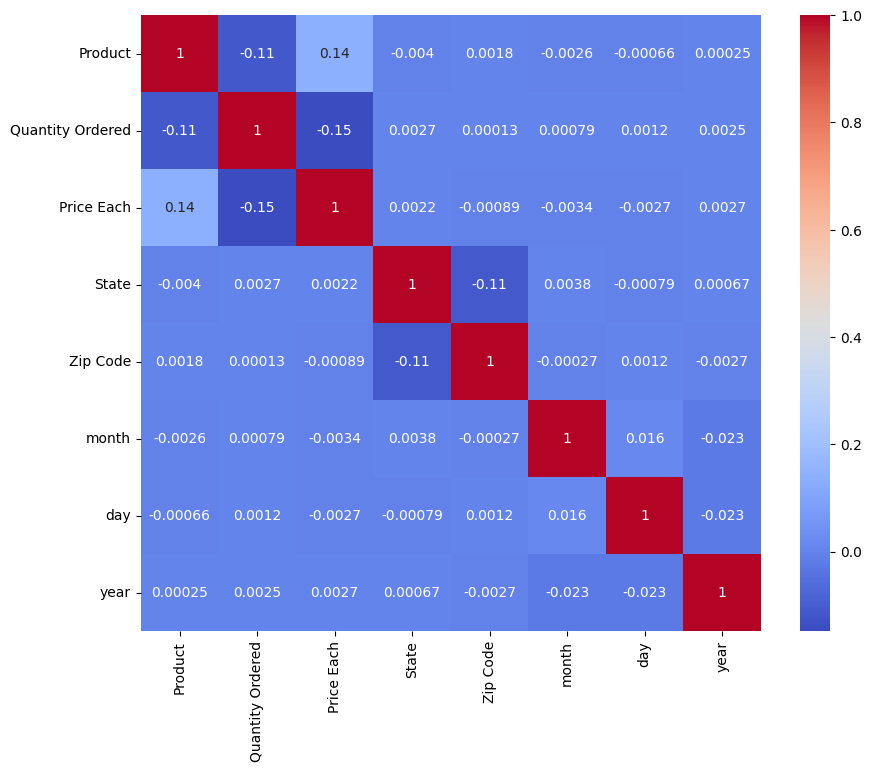

In [15]:
corr = df_with_id.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [16]:
product_1_data = df_with_id[df_with_id['Product'] == 4]

In [17]:
product_1_data.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
1,4,1,3.84,0,94016,01/01/19,1,1,2019
19,4,1,3.84,7,98101,01/01/19,1,1,2019
20,4,1,3.84,0,94016,01/01/19,1,1,2019
26,4,1,3.84,4,10001,01/01/19,1,1,2019
28,4,1,3.84,1,30301,01/01/19,1,1,2019


In [18]:
product_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20577 entries, 1 to 185941
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           20577 non-null  int32  
 1   Quantity Ordered  20577 non-null  int64  
 2   Price Each        20577 non-null  float64
 3   State             20577 non-null  int32  
 4   Zip Code          20577 non-null  int64  
 5   Date              20577 non-null  object 
 6   month             20577 non-null  int32  
 7   day               20577 non-null  int32  
 8   year              20577 non-null  int32  
dtypes: float64(1), int32(5), int64(2), object(1)
memory usage: 1.2+ MB


C:\Users\bhowm\AppData\Local\Temp\ipykernel_15748\458313495.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = product_1_data.corr()


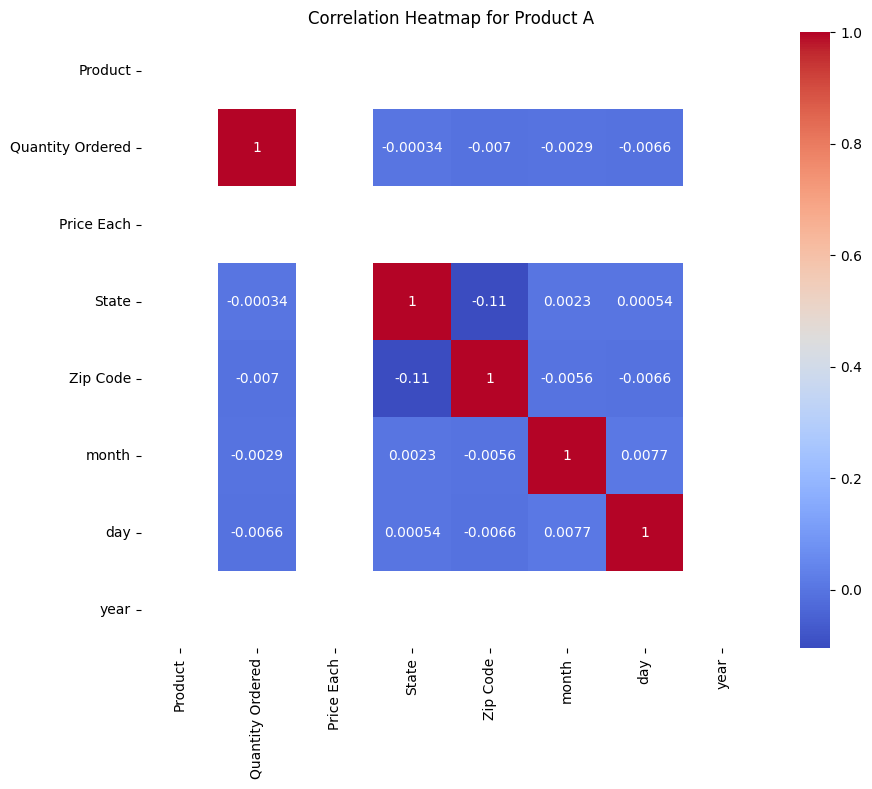

In [19]:
corr = product_1_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Product A')
plt.show()

C:\Users\bhowm\AppData\Local\Temp\ipykernel_15748\2177435554.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = group.corr()


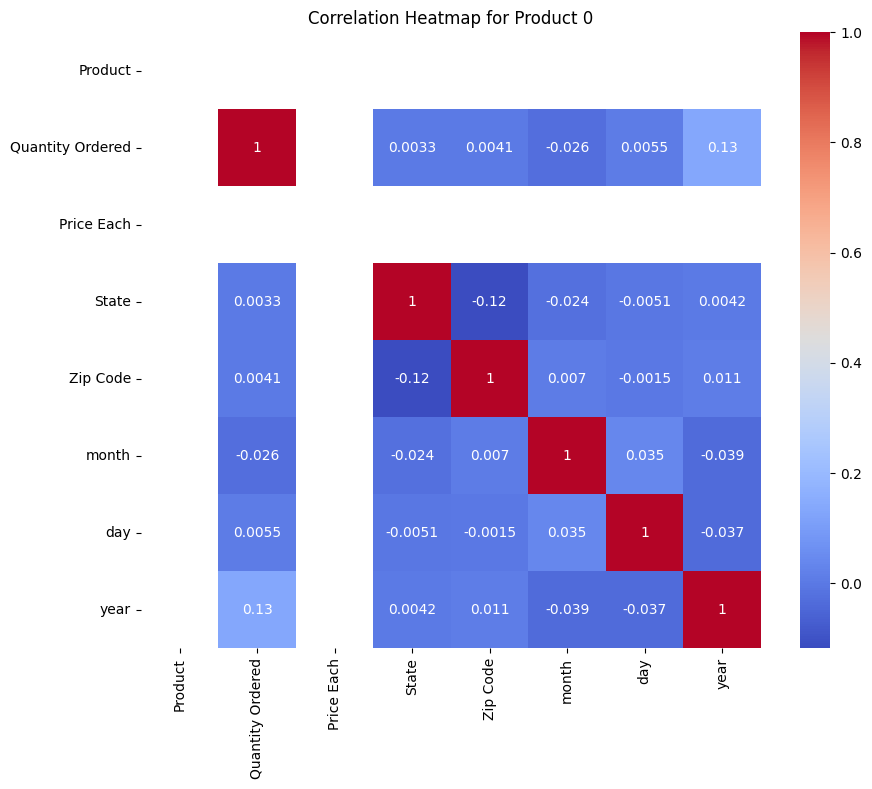

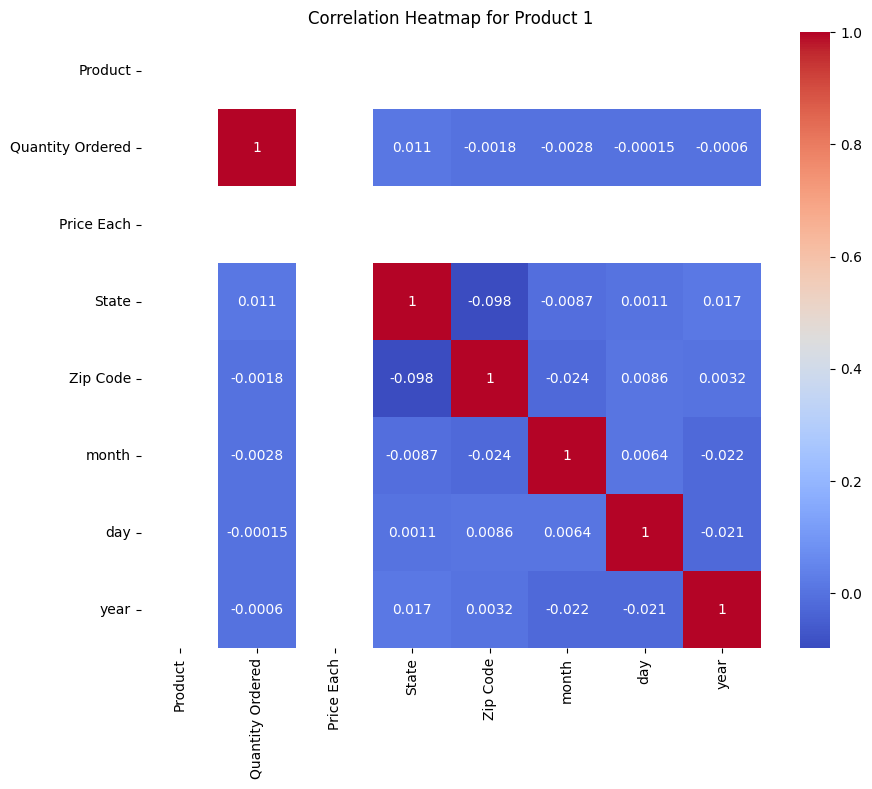

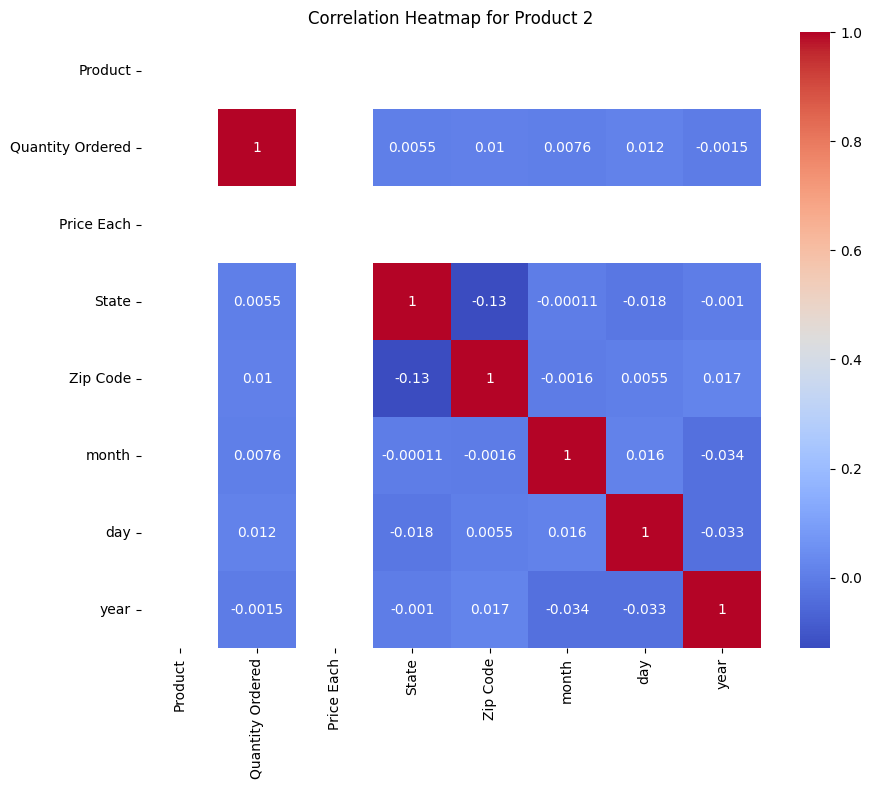

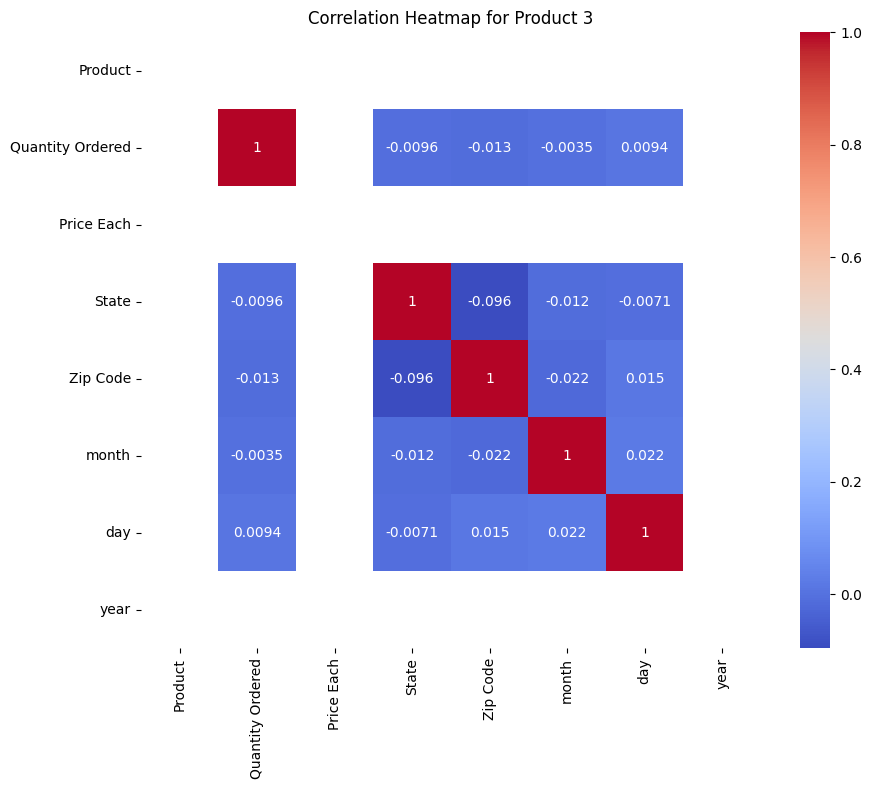

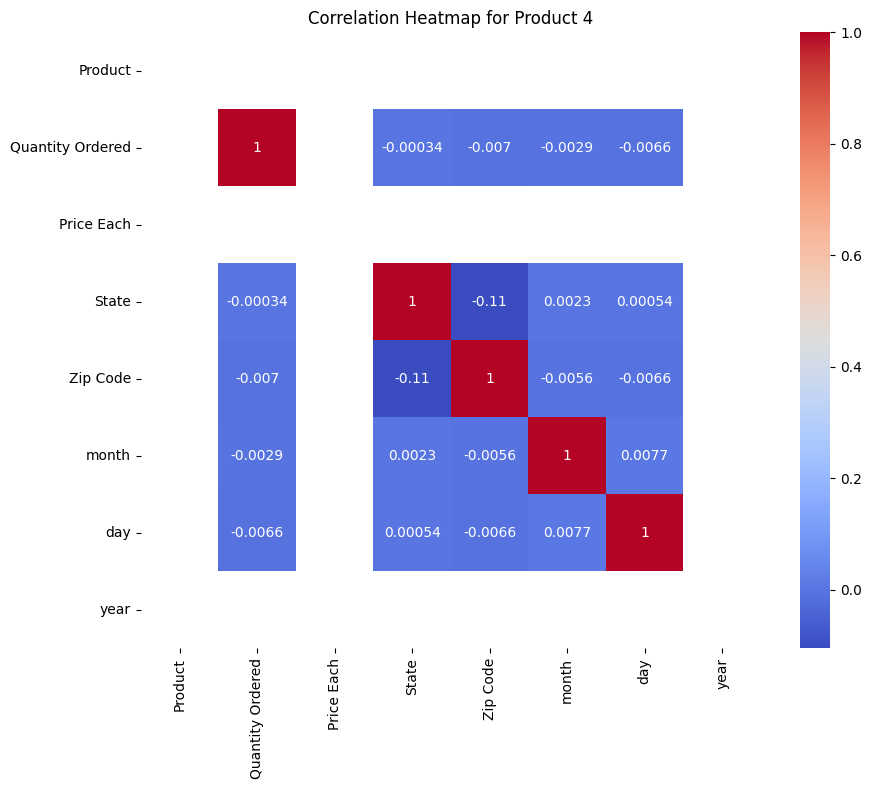

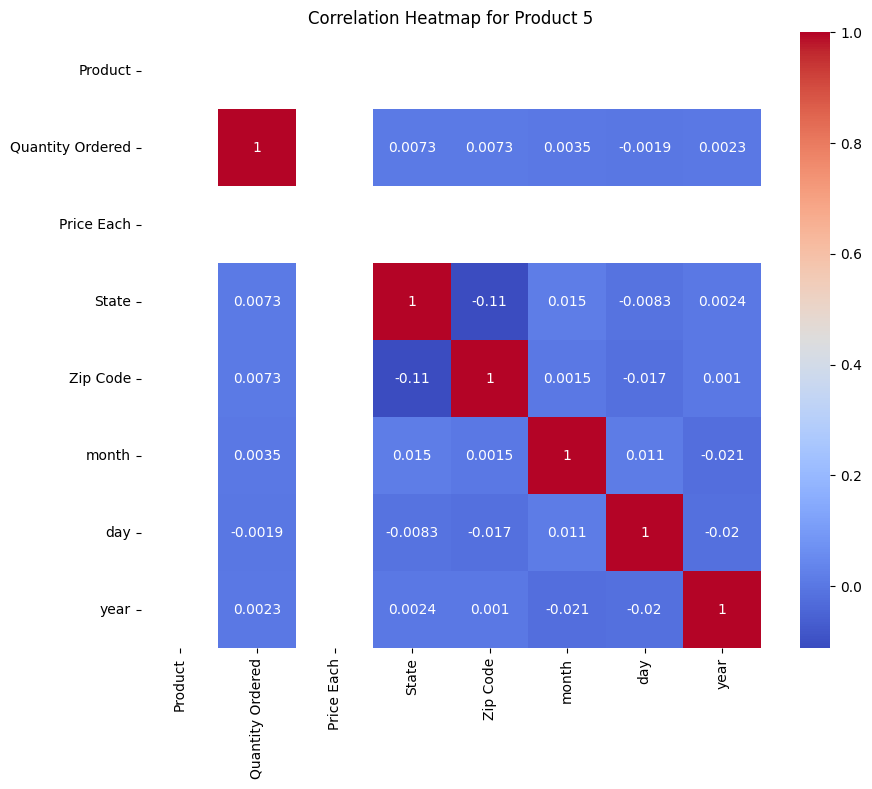

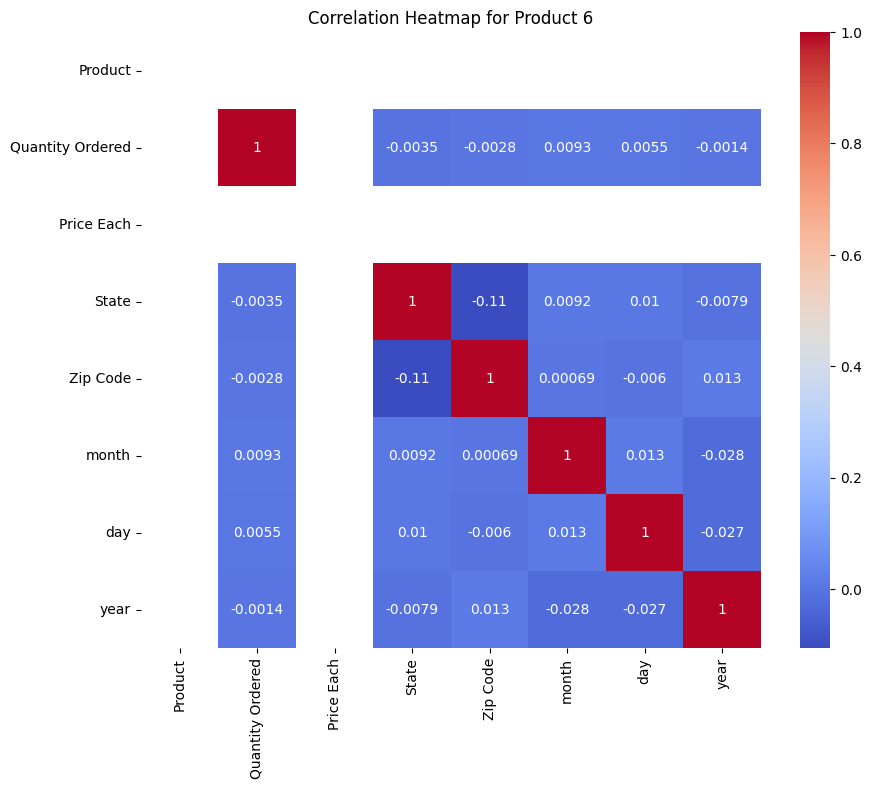

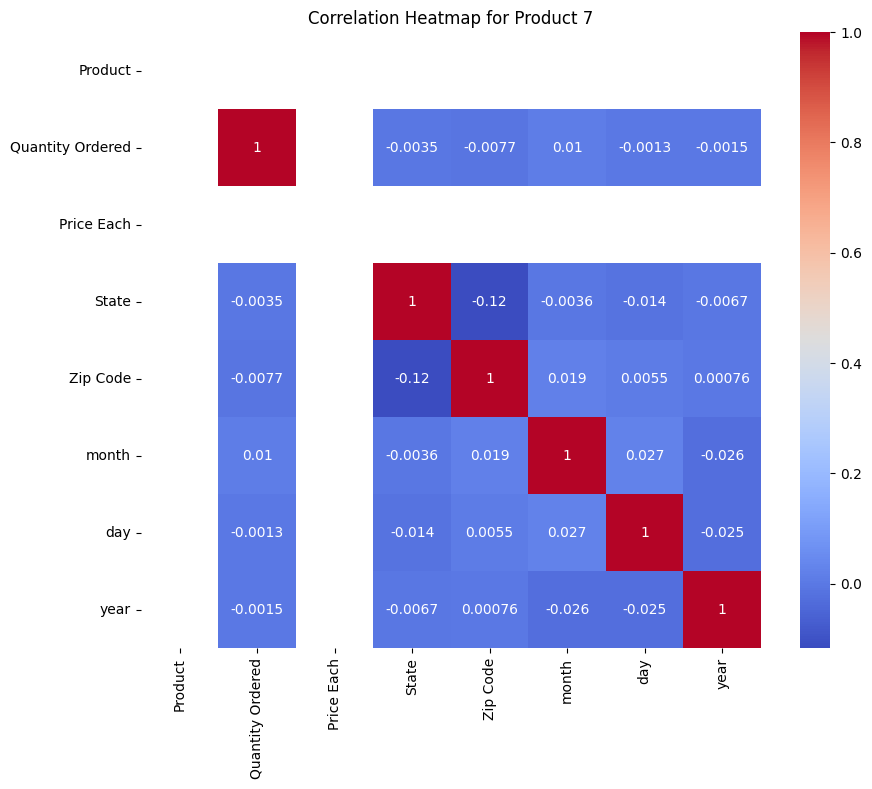

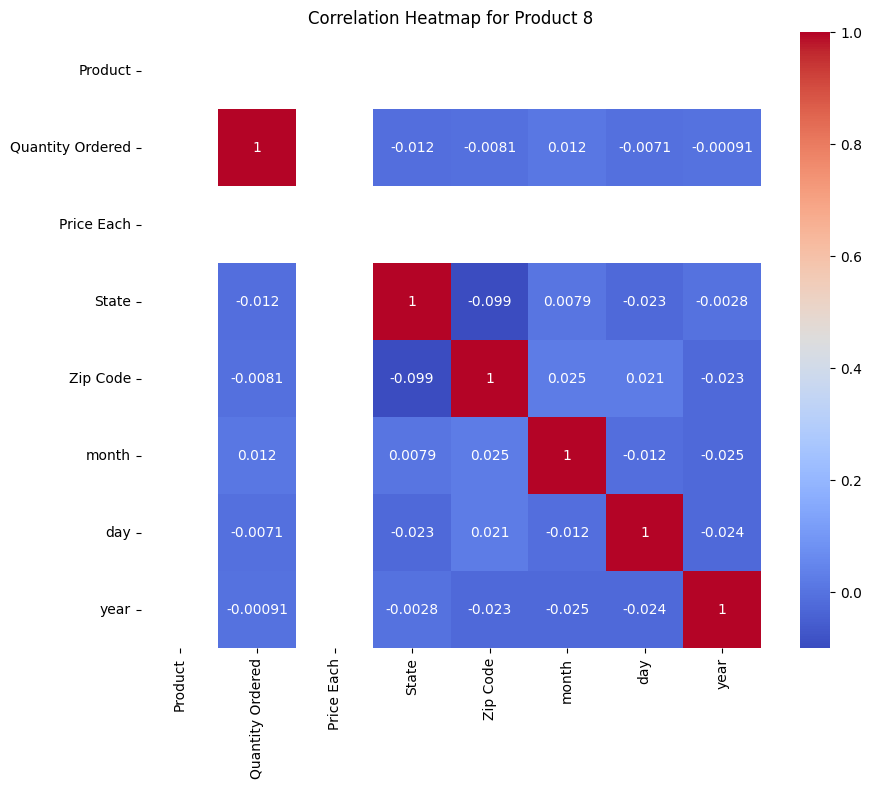

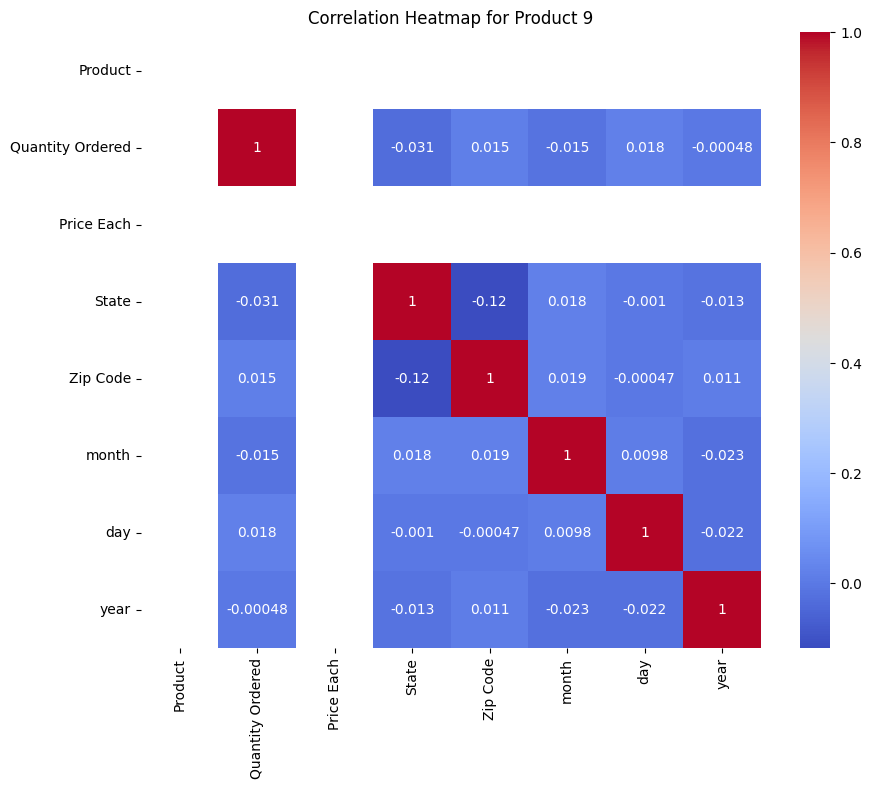

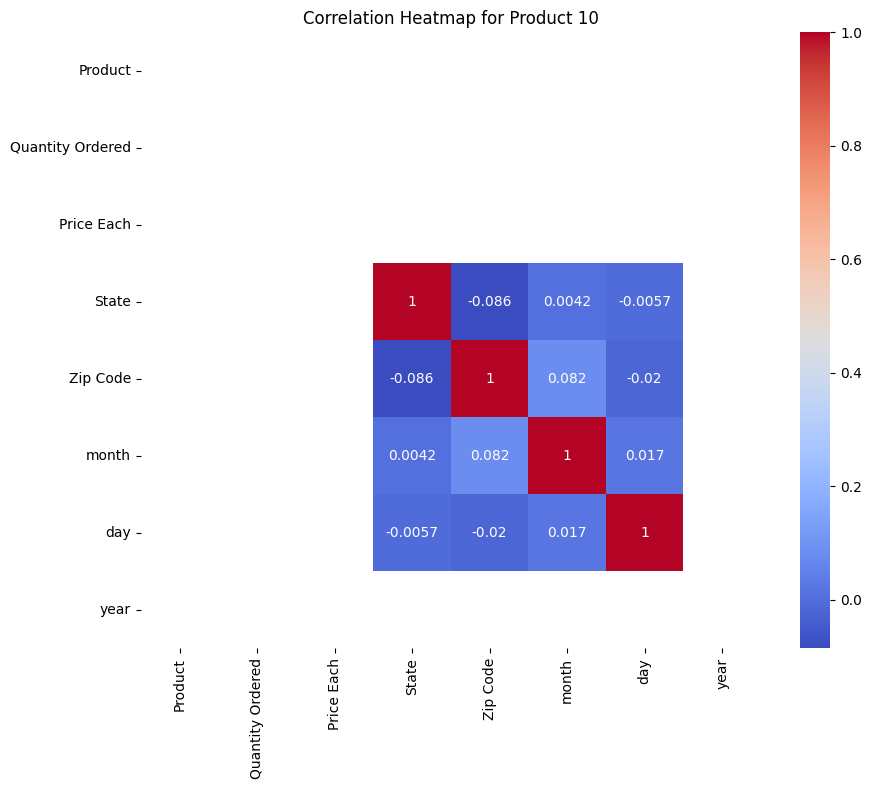

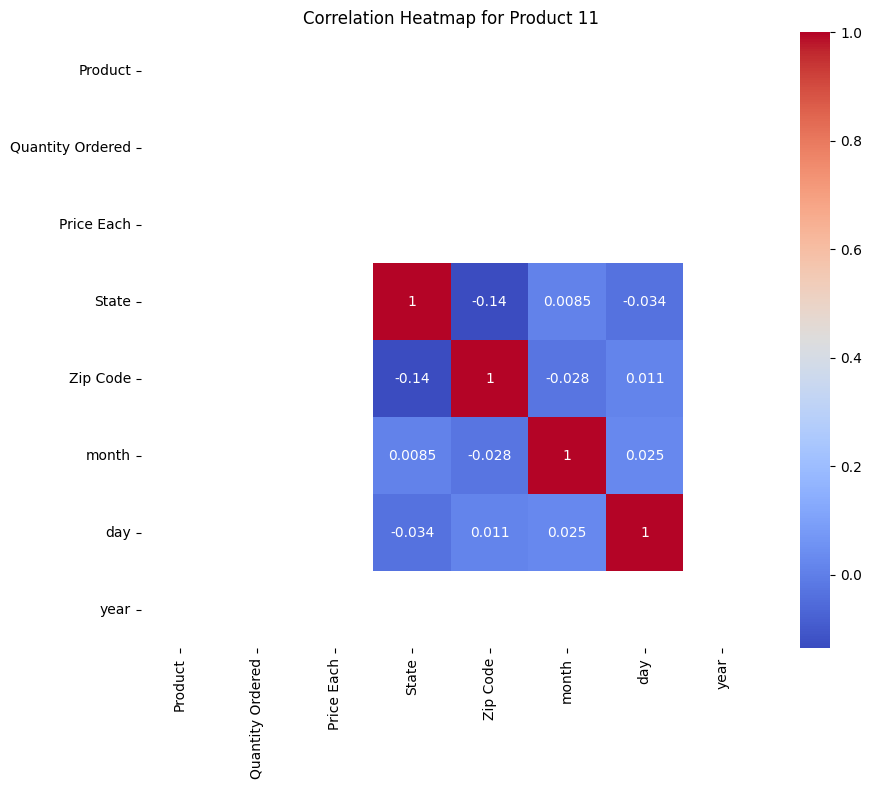

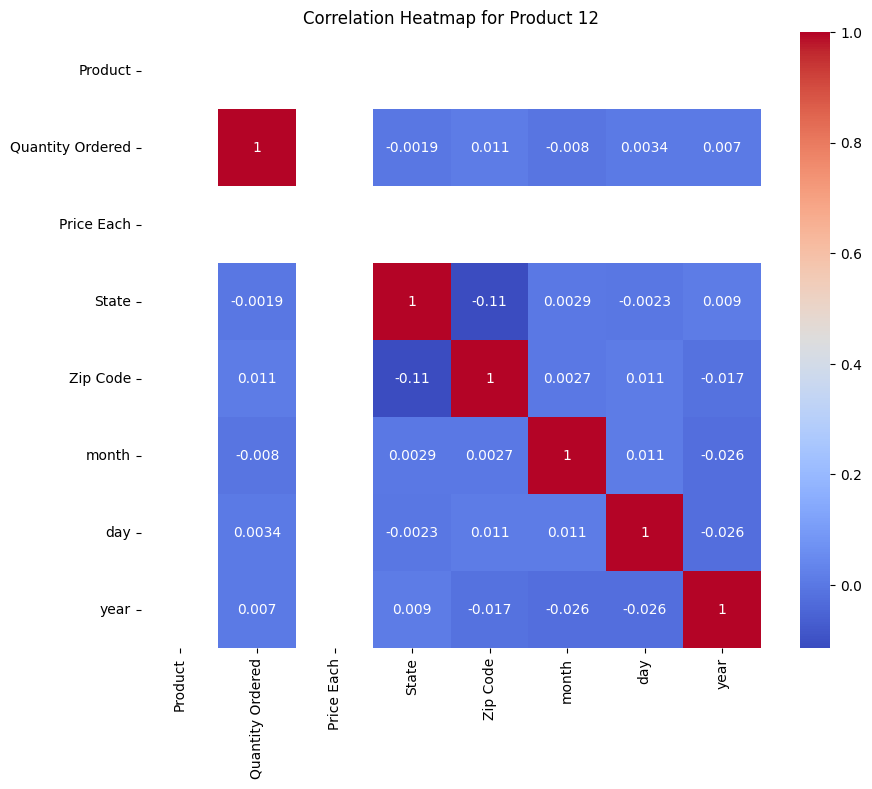

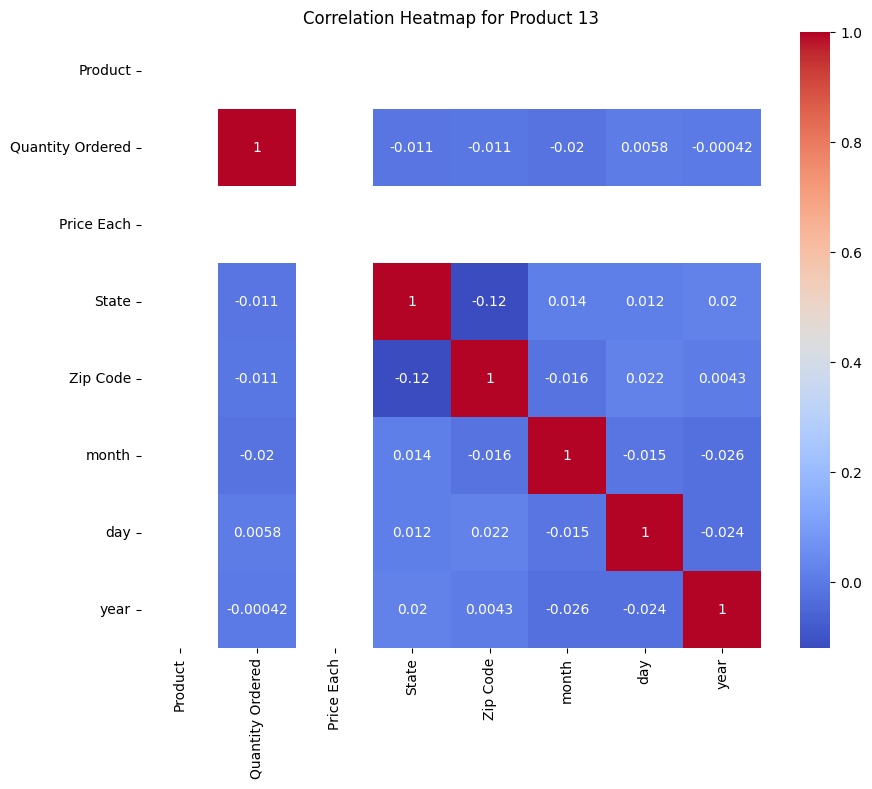

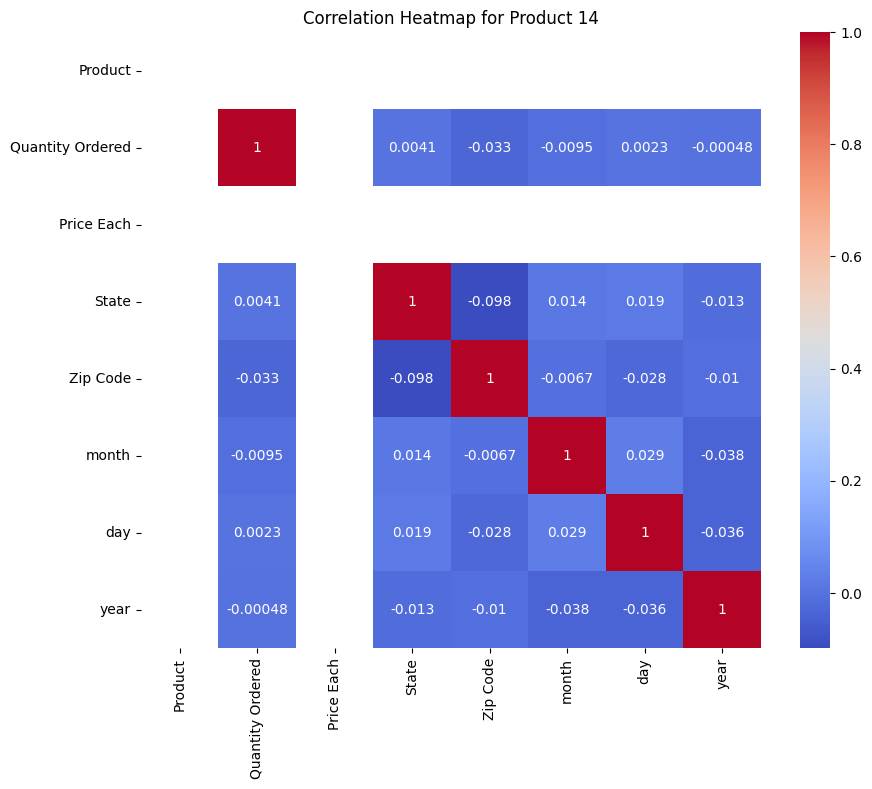

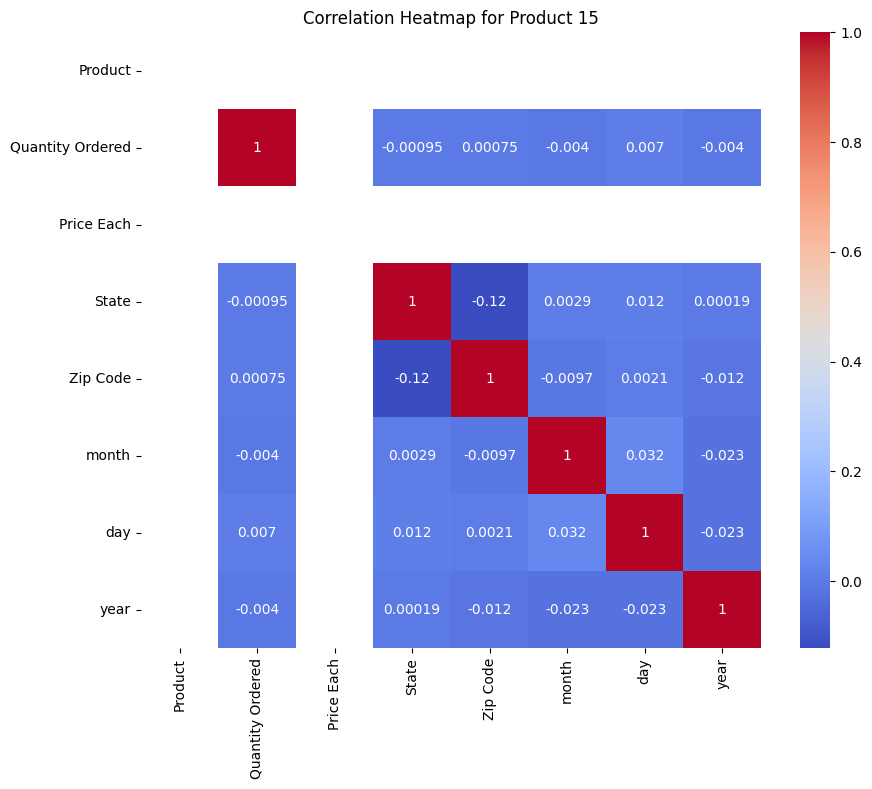

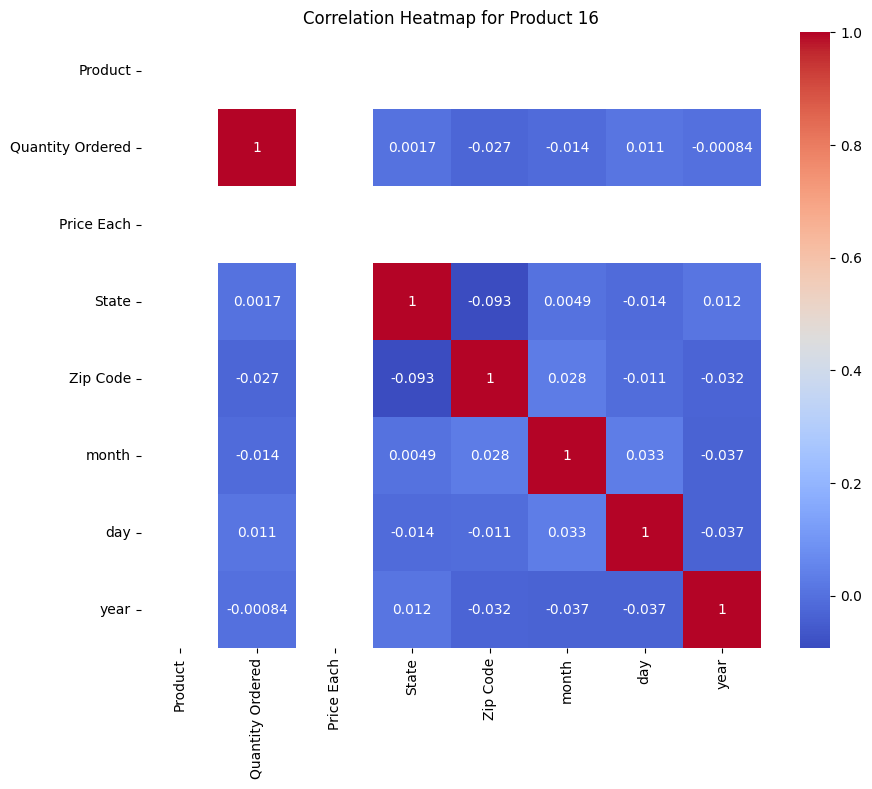

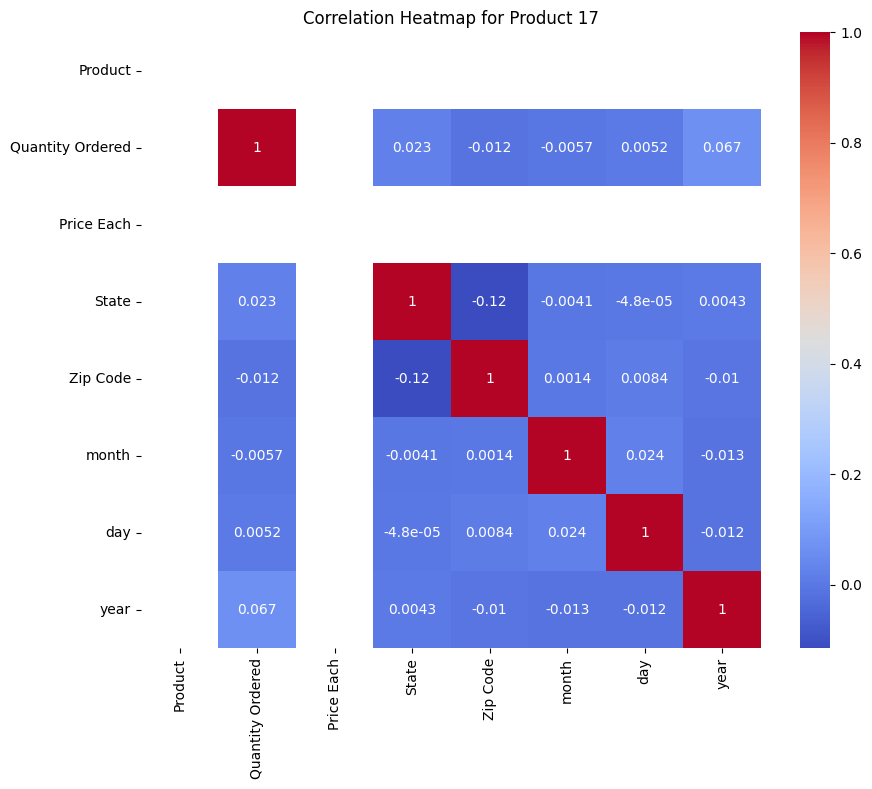

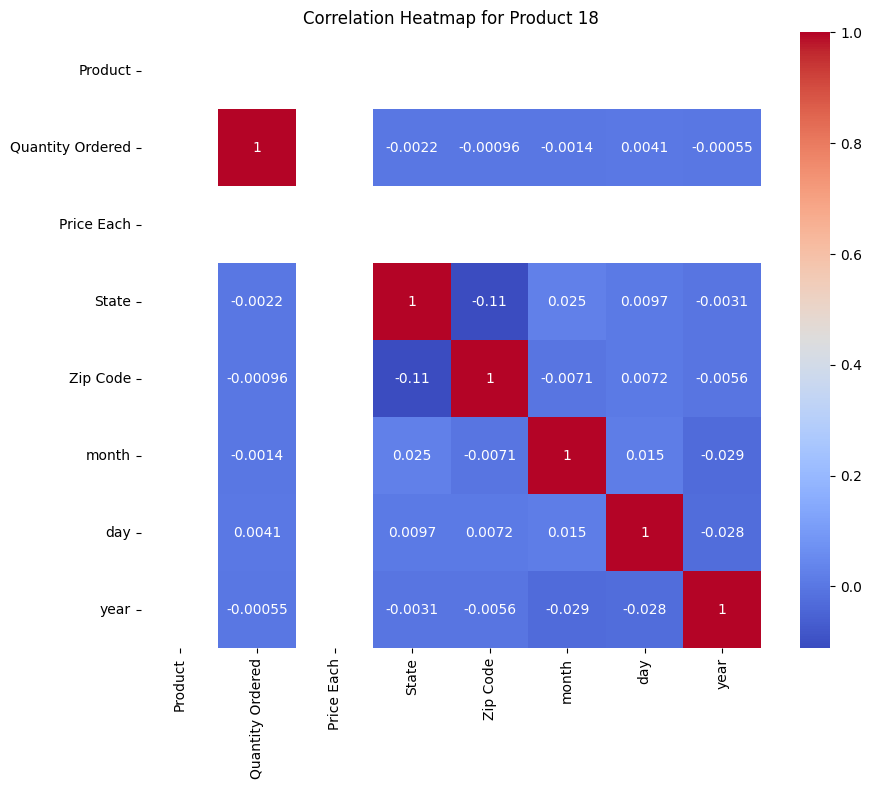

In [20]:
product_groups = df_with_id.groupby('Product')

for product, group in product_groups:
    corr = group.corr()
    
    plt.figure(figsize=(10, 8))
    
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    
    plt.title('Correlation Heatmap for Product {}'.format(product))
    
    plt.show()

In [21]:
product_10_data = df_with_id[df_with_id['Product'] == 4]
product_10_data.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
1,4,1,3.84,0,94016,01/01/19,1,1,2019
19,4,1,3.84,7,98101,01/01/19,1,1,2019
20,4,1,3.84,0,94016,01/01/19,1,1,2019
26,4,1,3.84,4,10001,01/01/19,1,1,2019
28,4,1,3.84,1,30301,01/01/19,1,1,2019


C:\Users\bhowm\AppData\Local\Temp\ipykernel_15748\2878620344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = product_10_data.corr()


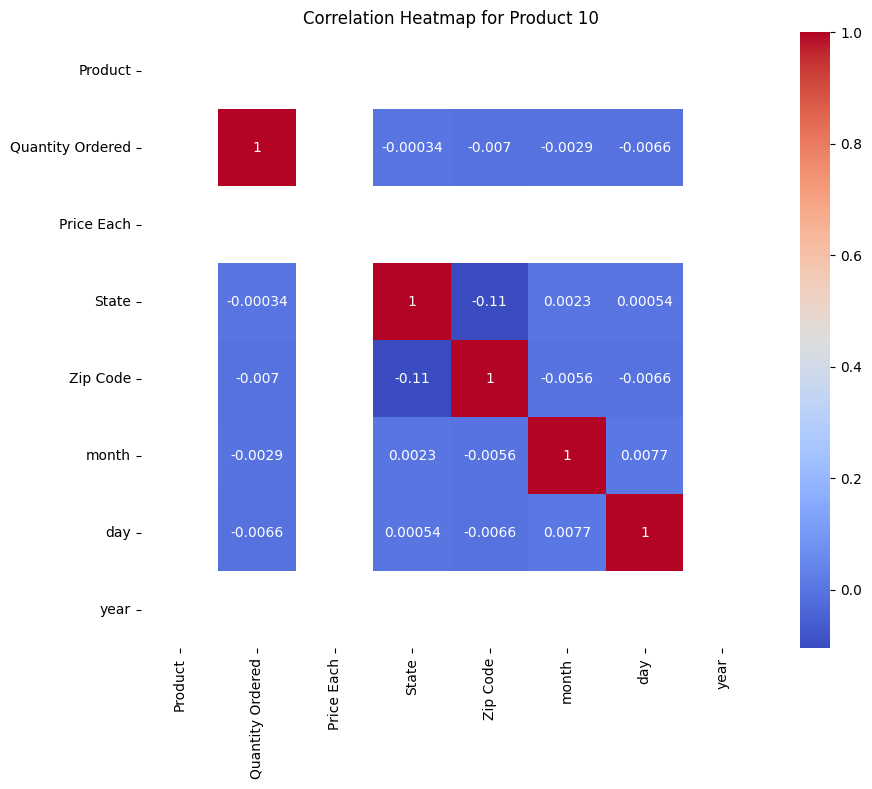

In [22]:
corr = product_10_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Product 10')
plt.show()

In [23]:
product_1_data.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
1,4,1,3.84,0,94016,01/01/19,1,1,2019
19,4,1,3.84,7,98101,01/01/19,1,1,2019
20,4,1,3.84,0,94016,01/01/19,1,1,2019
26,4,1,3.84,4,10001,01/01/19,1,1,2019
28,4,1,3.84,1,30301,01/01/19,1,1,2019


In [24]:
product_1_data.tail()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
185920,4,1,3.84,7,98101,12/31/19,12,31,2019
185922,4,1,3.84,1,30301,12/31/19,12,31,2019
185932,4,2,3.84,0,94016,12/31/19,12,31,2019
185936,4,1,3.84,3,4101,12/31/19,12,31,2019
185941,4,1,3.84,5,97035,12/31/19,12,31,2019


In [25]:
product_1_data = product_1_data.groupby('Date').sum('Quantity Ordered')
product_1_data.index = pd.to_datetime(product_1_data.index)
product_1_data = product_1_data.drop(['Product','Price Each', 'State', 'Zip Code', 'month', 'day', 'year'], axis=1)
product_1_data.head()

,Quantity Ordered
Date,
2019-01-01,33
2019-01-02,54
2019-01-03,44
2019-01-04,30
2019-01-05,50


In [26]:
product_1_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Quantity Ordered  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [27]:
product_1_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Quantity Ordered  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


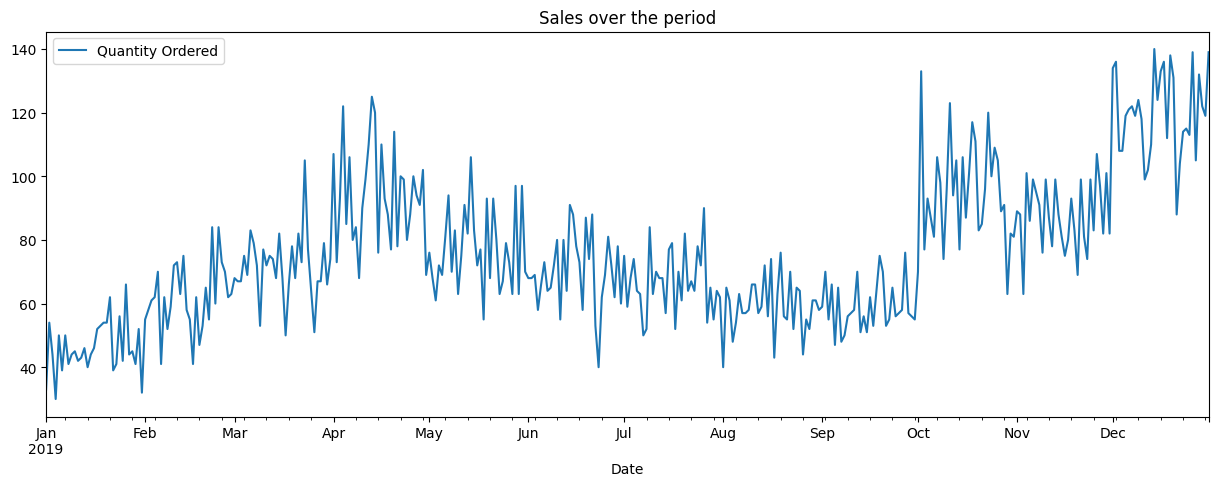

In [28]:
product_1_data.plot(
        # style='.',
        figsize=(15, 5),
        title='Sales over the period')
plt.show()

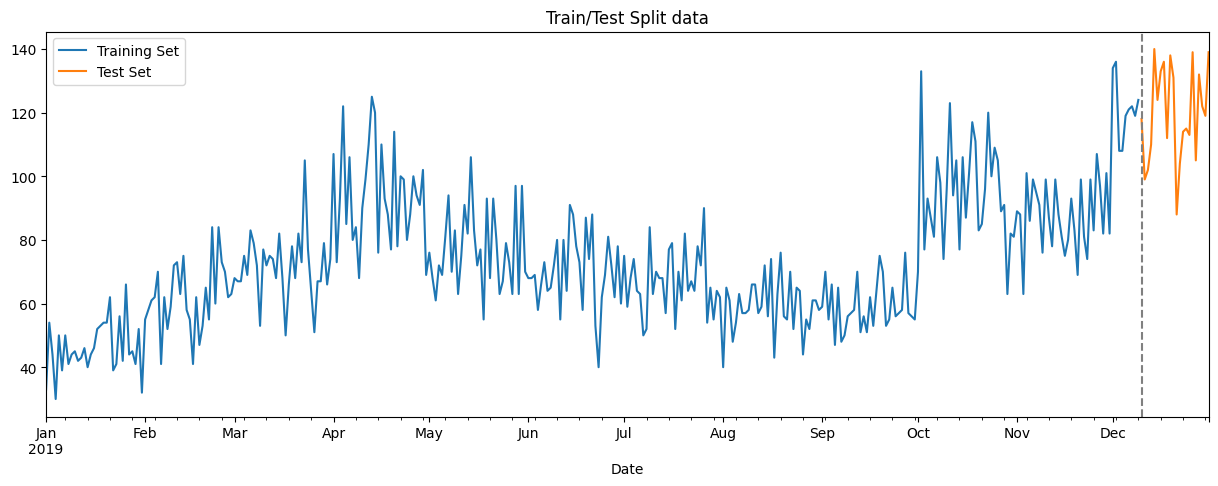

In [29]:
train = product_1_data.loc[product_1_data.index < '2019-12-10']
test = product_1_data.loc[product_1_data.index >= '2019-12-10']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Train/Test Split data')
test.plot(ax=ax, label='Test Set')
ax.axvline('2019-12-10', color='Gray', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

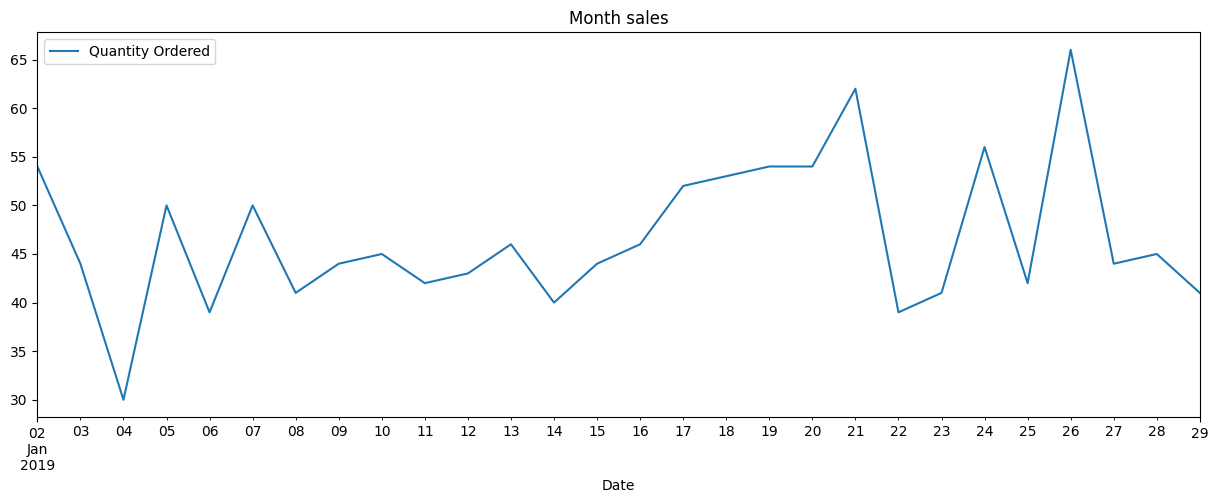

In [30]:
product_1_data.loc[(product_1_data.index > '2019-01-01') & (product_1_data.index < '2019-01-30')] \
    .plot(figsize=(15, 5), title='Month sales')
plt.show()

In [31]:
def create_features(product_1_data):
    """
    Creating time series features based on dataframe index.
    """
    product_1_data = product_1_data.copy()
    # df['hour'] = df.index.hour
    product_1_data['dayofweek'] = product_1_data.index.dayofweek
    product_1_data['quarter'] = product_1_data.index.quarter
    product_1_data['month'] = product_1_data.index.month
    product_1_data['year'] = product_1_data.index.year
    product_1_data['dayofyear'] = product_1_data.index.dayofyear
    product_1_data['dayofmonth'] = product_1_data.index.day
    product_1_data['weekofyear'] = product_1_data.index.isocalendar().week
    return product_1_data

product_1_data = create_features(product_1_data)

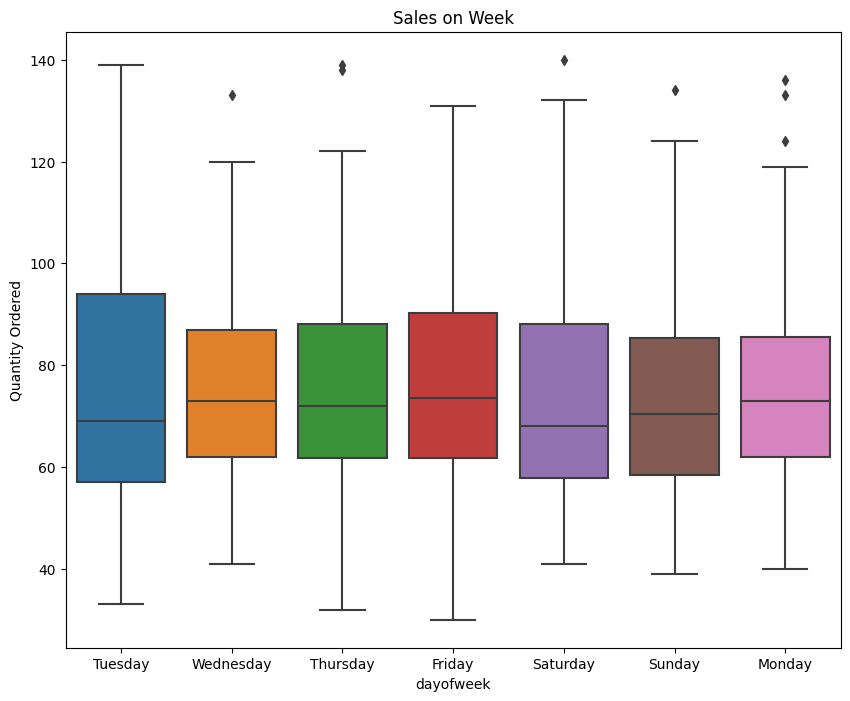

In [32]:
week_day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}
df_temp = product_1_data.copy()
df_temp['dayofweek'] = df_temp['dayofweek'].map(lambda index: week_day_map[index])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp, x='dayofweek', y='Quantity Ordered')
ax.set_title('Sales on Week')
plt.show()

In [33]:
quantile_98 = df_temp['Quantity Ordered'].quantile(0.96)
producr_1_data_outliers = df_temp[df_temp['Quantity Ordered'] < quantile_98]

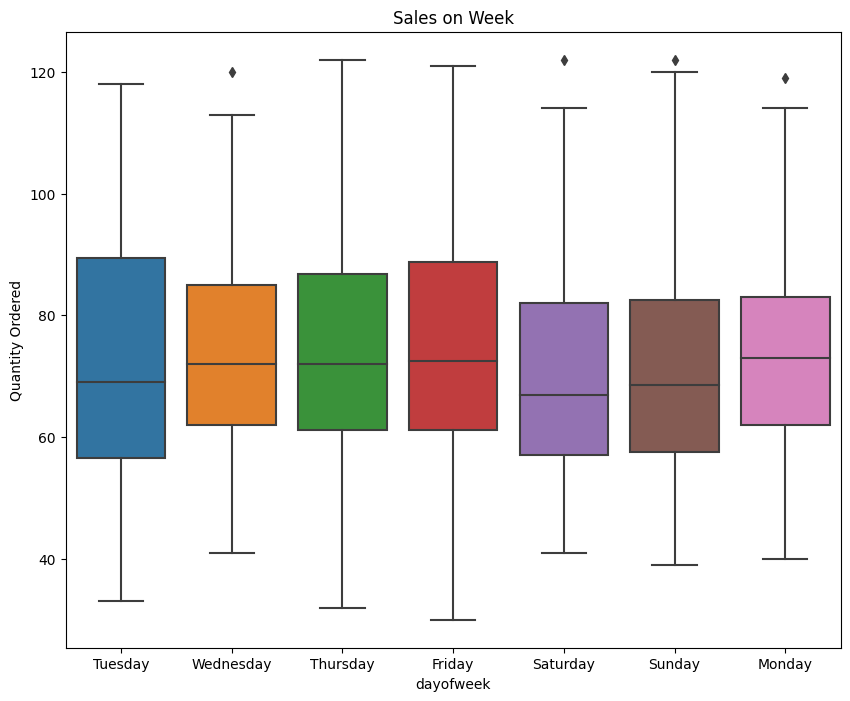

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=producr_1_data_outliers, x='dayofweek', y='Quantity Ordered')
ax.set_title('Sales on Week')
plt.show()

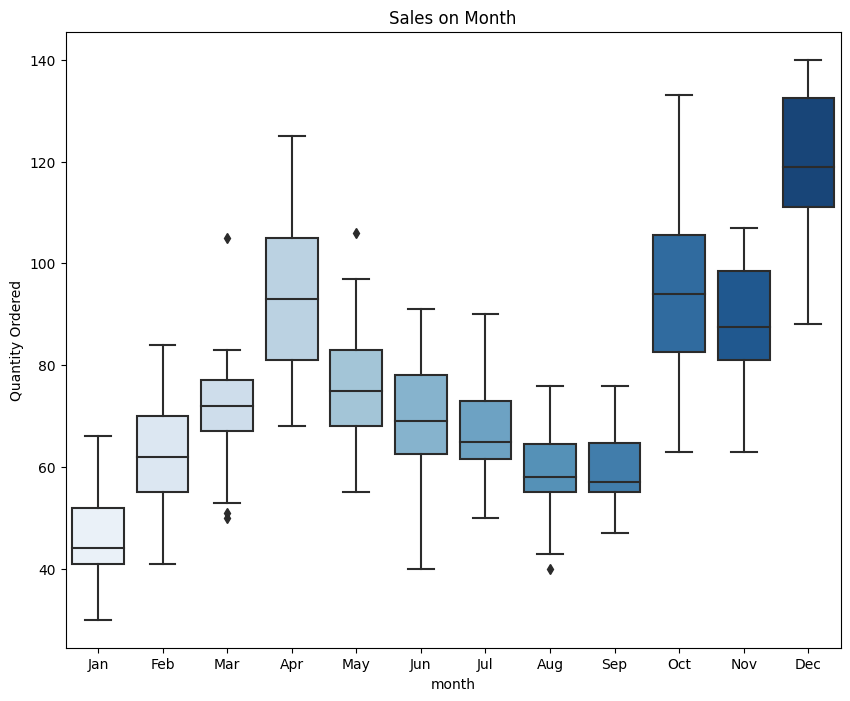

In [35]:
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
df_temp = product_1_data.copy()
df_temp['month'] = df_temp['month'].map(lambda index: month_map[index])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp, x='month', y='Quantity Ordered', palette='Blues')
ax.set_title('Sales on Month')
plt.show()

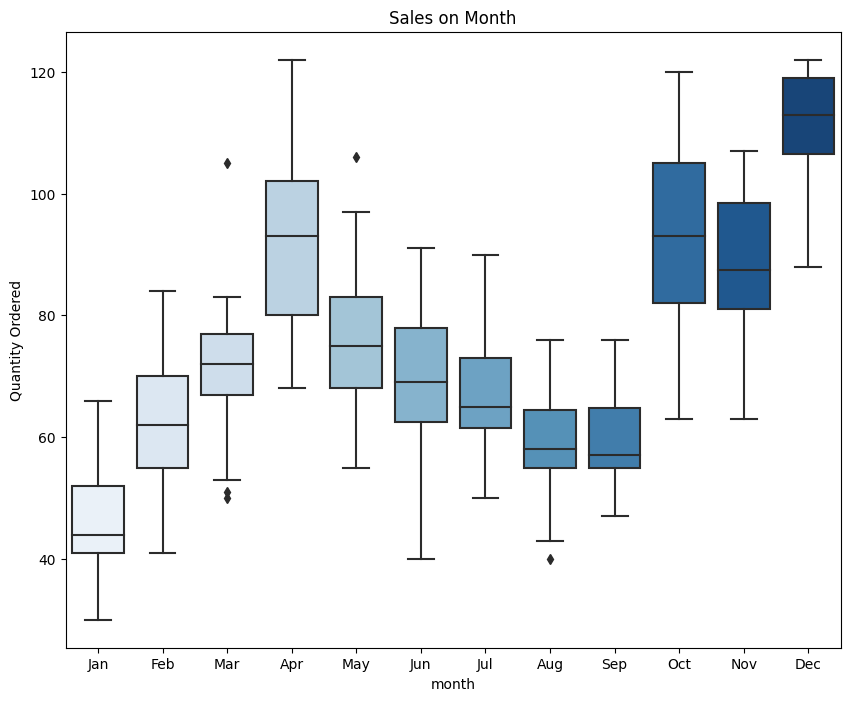

In [36]:
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
df_temp_2 = producr_1_data_outliers.copy()
df_temp_2['month'] = df_temp_2['month'].map(lambda index: month_map[index])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp_2, x='month', y='Quantity Ordered', palette='Blues')
ax.set_title('Sales on Month')
plt.show()

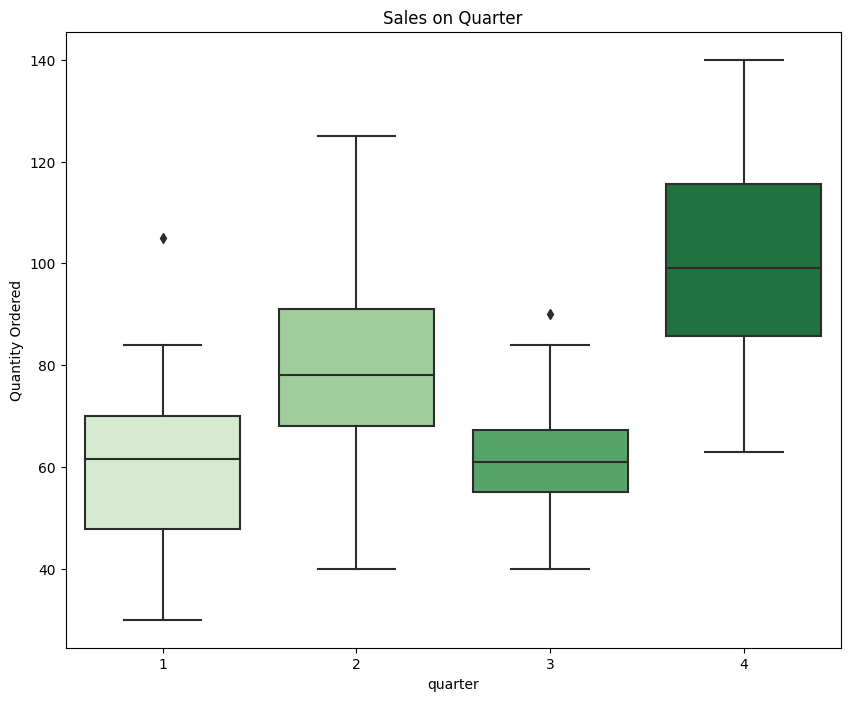

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp, x='quarter', y='Quantity Ordered', palette='Greens')
ax.set_title('Sales on Quarter')
plt.show()

In [38]:
train = create_features(train)
test = create_features(test)

# FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'dayofmonth']
FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofmonth']
TARGET = 'Quantity Ordered'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Lasso, Ridge

In [40]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [41]:
product_1_data_lr = product_1_data

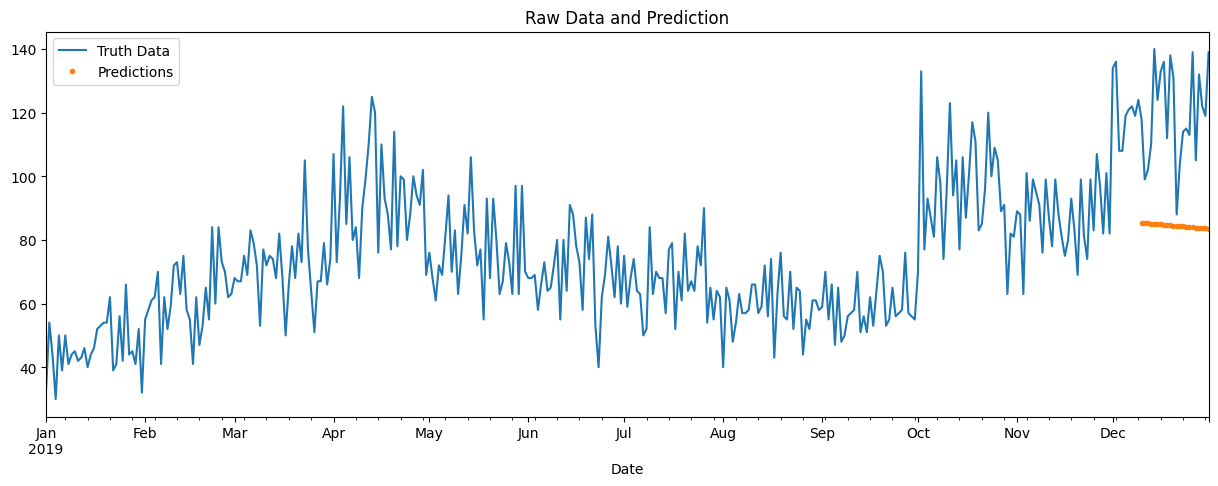

In [42]:
test['prediction_lr'] = linreg_model.predict(X_test)
product_1_data_lr = product_1_data_lr.merge(test[['prediction_lr']], how='left', left_index=True, right_index=True)
ax = product_1_data_lr[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_lr['prediction_lr'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [43]:
linreg_rmse = np.sqrt(mean_squared_error(test['Quantity Ordered'], test['prediction_lr']))
linreg_mae = mean_absolute_error(test['Quantity Ordered'], test['prediction_lr'])
linreg_r2 = r2_score(test['Quantity Ordered'], test['prediction_lr'])
print('Linear Regression RMSE: ', linreg_rmse)
print('Linear Regression MAE: ', linreg_mae)
print('Linear Regression R2 Score: ', linreg_r2)

Linear Regression RMSE:  38.18567173060017
Linear Regression MAE:  35.227416728852646
Linear Regression R2 Score:  -5.821337840831851


In [44]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [45]:
product_1_data_rf = product_1_data

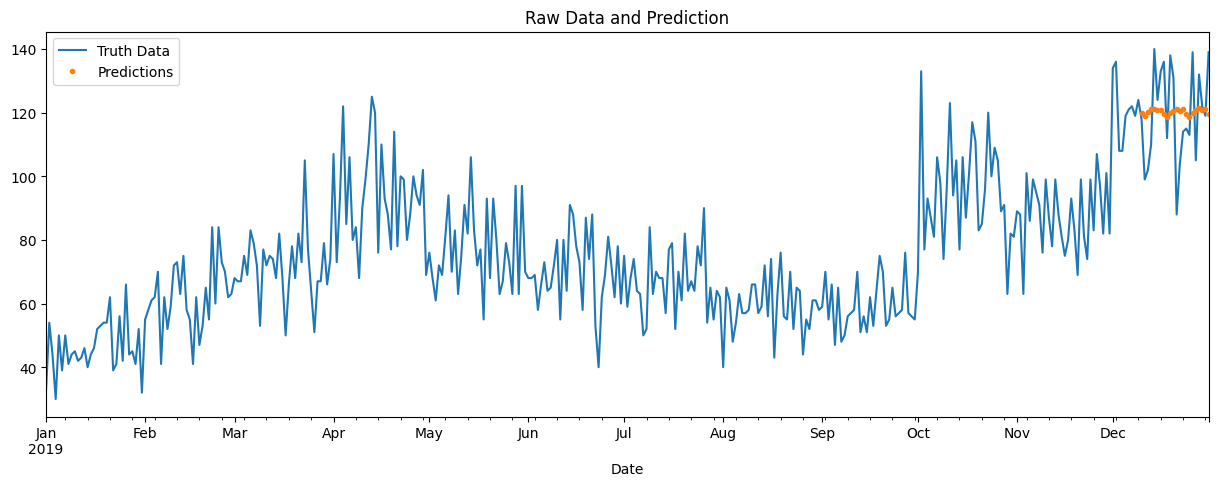

In [46]:
test['prediction_rf'] = rf_model.predict(X_test)
product_1_data_rf = product_1_data_rf.merge(test[['prediction_rf']], how='left', left_index=True, right_index=True)
ax = product_1_data_rf[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_rf['prediction_rf'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [47]:
rf_rmse = np.sqrt(mean_squared_error(test['Quantity Ordered'], test['prediction_rf']))
rf_mae = mean_absolute_error(test['Quantity Ordered'], test['prediction_rf'])
rf_r2 = r2_score(test['Quantity Ordered'], test['prediction_rf'])
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest MAE: ', rf_mae)
print('Random Forest R2 Score: ', rf_r2)

Random Forest RMSE:  14.621024712254735
Random Forest MAE:  12.353636363636362
Random Forest R2 Score:  -5.59824474926085e-05


In [48]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[19:43:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:74.41164	validation_1-rmse:119.14972
[100]	validation_0-rmse:30.04073	validation_1-rmse:52.06589
[200]	validation_0-rmse:15.42694	validation_1-rmse:25.47285
[300]	validation_0-rmse:11.72868	validation_1-rmse:17.78371
[400]	validation_0-rmse:10.81818	validation_1-rmse:15.85626
[500]	validation_0-rmse:10.46831	validation_1-rmse:15.34927
[600]	validation_0-rmse:10.28149	validation_1-rmse:15.18467
[700]	validation_0-rmse:10.09606	validation_1-rmse:15.11073
[728]	validation_0-rmse:10.03623	validation_1-rmse:15.11373


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

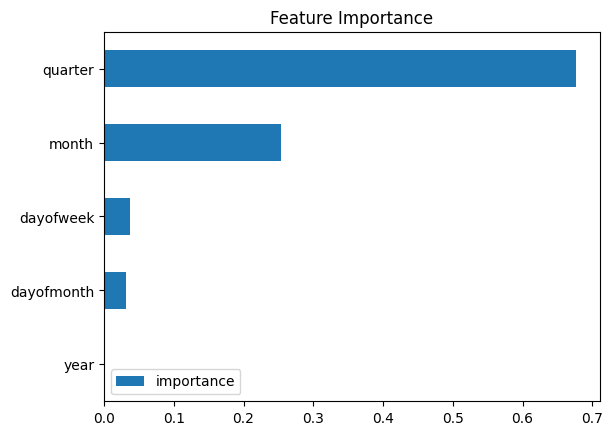

In [49]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [50]:
product_1_data_xg = product_1_data

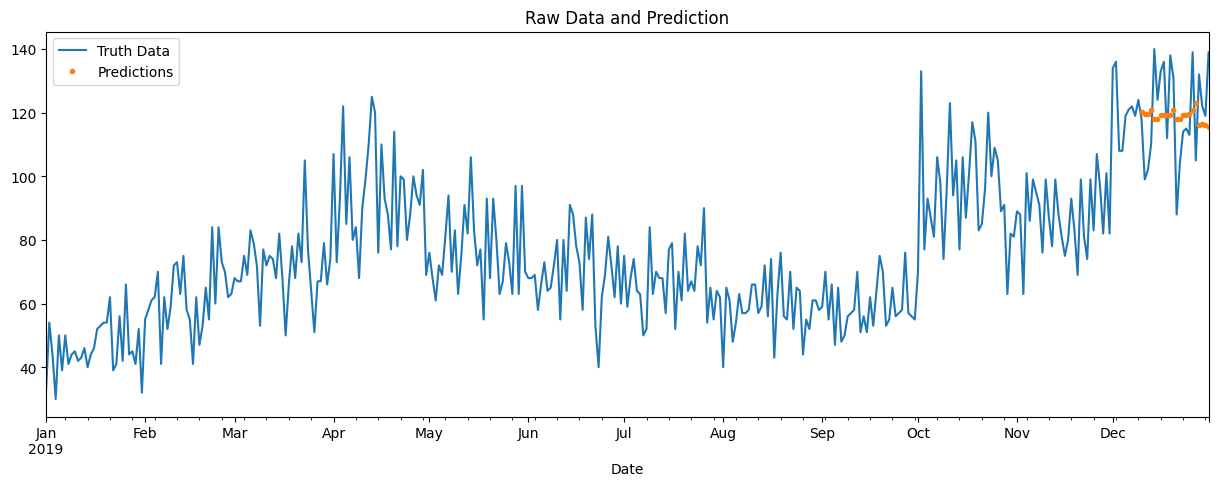

In [51]:
test['prediction_xg'] = reg.predict(X_test)
product_1_data_xg = product_1_data_xg.merge(test[['prediction_xg']], how='left', left_index=True, right_index=True)
ax = product_1_data_xg[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_xg['prediction_xg'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

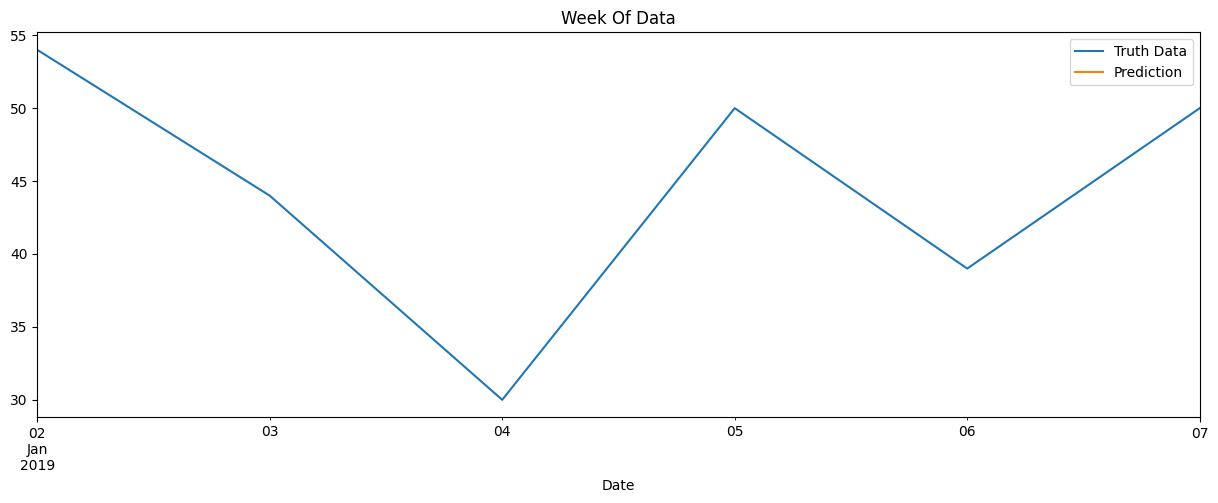

In [52]:
ax = product_1_data_xg.loc[(product_1_data_xg.index > '2019-01-01') & (product_1_data_xg.index < '2019-01-08')]['Quantity Ordered'] \
    .plot(figsize=(15, 5), title='Week Of Data')
product_1_data_xg.loc[(product_1_data_xg.index > '2019-01-01') & (product_1_data_xg.index < '2019-01-08')]['prediction_xg'] \
    .plot()
plt.legend(['Truth Data','Prediction'])
plt.show()

In [53]:
xg_rmse = np.sqrt(mean_squared_error(test['Quantity Ordered'], test['prediction_xg']))
xg_mae = mean_absolute_error(test['Quantity Ordered'], test['prediction_xg'])
xg_r2 = r2_score(test['Quantity Ordered'], test['prediction_xg'])
print('XGBoost RMSE: ', xg_rmse)
print('XGBoost MAE: ', xg_mae)
print('XGBoost R2 Score: ', xg_r2)

XGBoost RMSE:  15.106054719371327
XGBoost MAE:  13.16844419999556
XGBoost R2 Score:  -0.06750716081775865


In [54]:
linreg_stats = [linreg_rmse, linreg_mae, linreg_r2]
rf_stats = [rf_rmse, rf_mae, rf_r2]
xgb_stats = [xg_rmse, xg_mae, xg_r2]

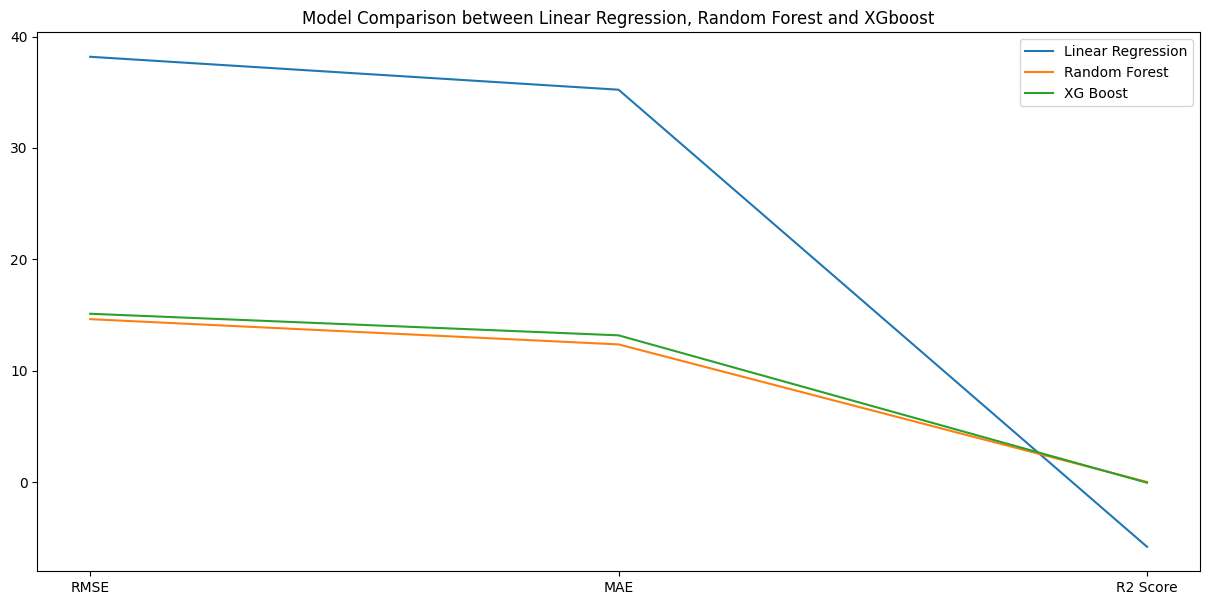

In [55]:
plt.figure(figsize=(15,7))
plt.plot(linreg_stats)
plt.plot(rf_stats)
plt.plot(xgb_stats)
plt.title("Model Comparison between Linear Regression, Random Forest and XGboost")
plt.xticks([0,1,2], labels=['RMSE','MAE','R2 Score'])
plt.legend(["Linear Regression", "Random Forest", "XG Boost"])
plt.show()

In [56]:
test['prediction'] = test['prediction_rf']
product_1_data_rf['prediction'] = product_1_data_rf['prediction_rf']

In [57]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['Dates'] = test.index.date

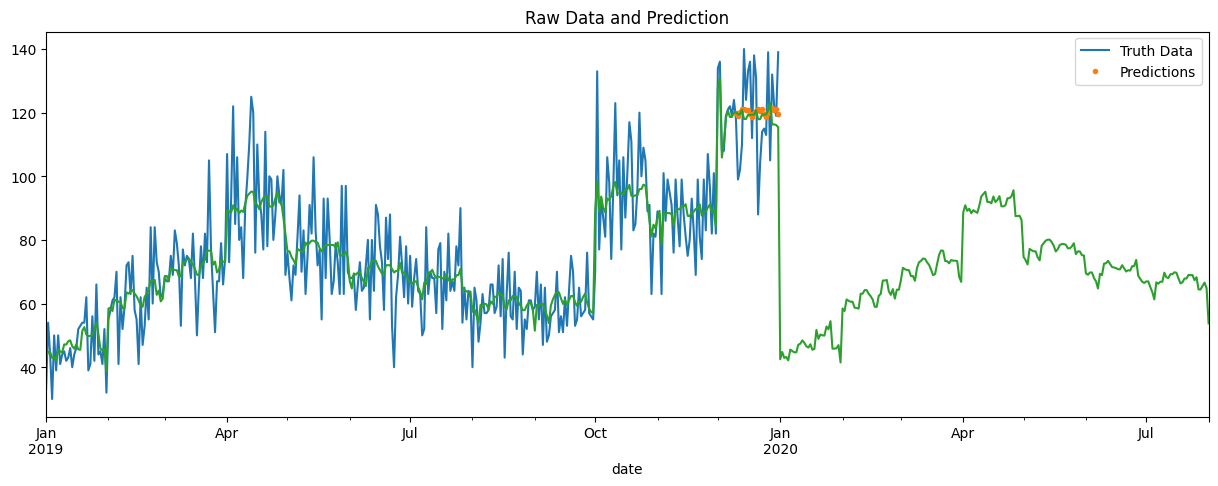

In [58]:
to_predict = pd.DataFrame(pd.date_range(start="2019-01-01", end="2020-08-01"), columns=['date'])
to_predict.index = pd.to_datetime(to_predict.date)

to_predict_feature = create_features(to_predict)
to_predict_feature = to_predict_feature[FEATURES]

to_predict_feature['prediction'] = reg.predict(to_predict_feature)
ax = product_1_data_rf[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_rf['prediction'].plot(ax=ax, style='.')
to_predict_feature['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

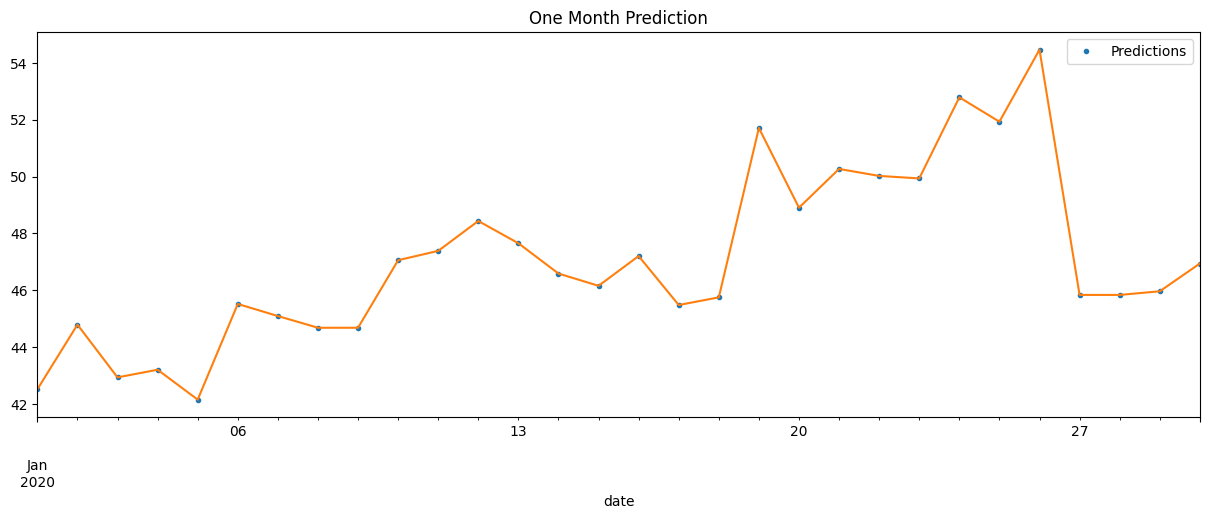

In [59]:
to_predict = pd.DataFrame(pd.date_range(start="2020-01-01", end="2020-01-30"), columns=['date'])
to_predict.index = pd.to_datetime(to_predict.date)

to_predict_feature = create_features(to_predict)
to_predict_feature = to_predict_feature[FEATURES]

to_predict_feature['prediction'] = reg.predict(to_predict_feature)
ax = to_predict_feature['prediction'].plot(figsize=(15, 5), style='.')
to_predict_feature['prediction'].plot(ax=ax)
plt.legend(['Predictions'])
ax.set_title('One Month Prediction')
plt.show()

In [60]:
test['prediction'] = test['prediction_xg']
product_1_data_xg['prediction'] = product_1_data_xg['prediction_xg']

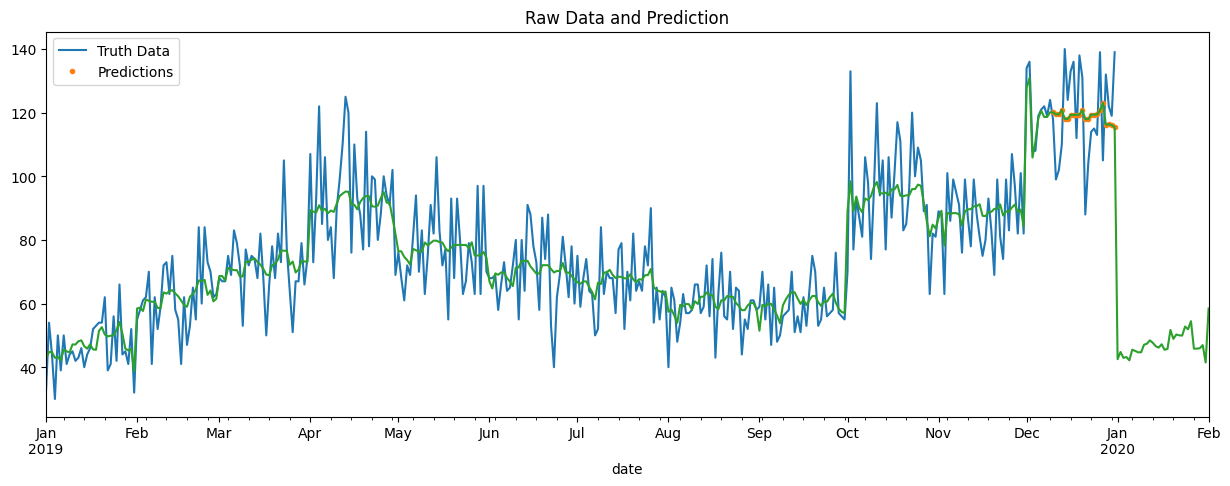

In [61]:
to_predict = pd.DataFrame(pd.date_range(start="2019-01-01", end="2020-02-01"), columns=['date'])
to_predict.index = pd.to_datetime(to_predict.date)

to_predict_feature = create_features(to_predict)
to_predict_feature = to_predict_feature[FEATURES]

to_predict_feature['prediction'] = reg.predict(to_predict_feature)
ax = product_1_data_xg[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_xg['prediction'].plot(ax=ax, style='.')
to_predict_feature['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

C:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


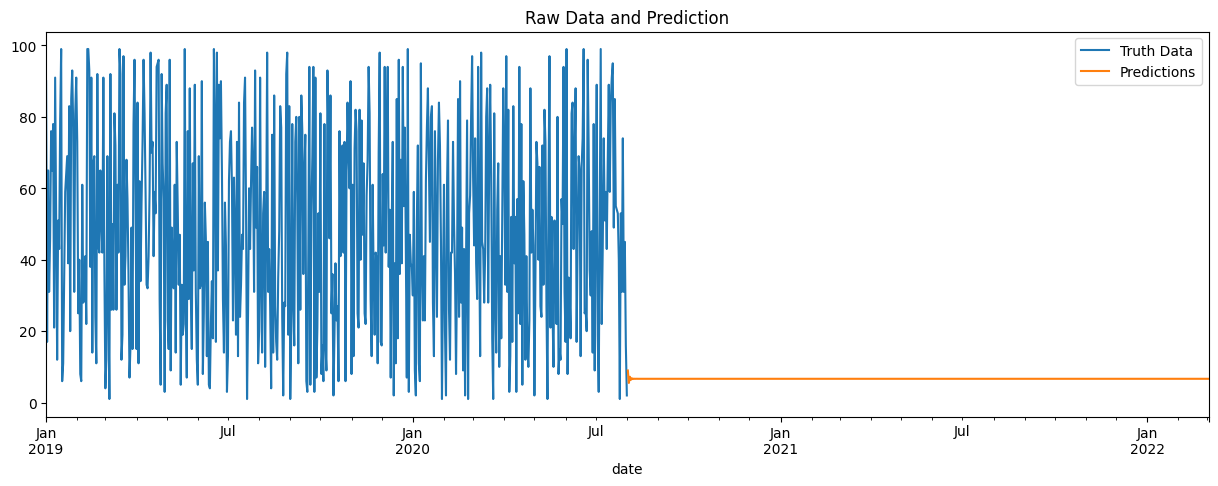

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# create sample data
start_date = "2019-01-01"
end_date = "2020-08-01"
dates = pd.date_range(start=start_date, end=end_date, freq="D")
data = np.random.randint(low=1, high=100, size=len(dates))
df = pd.DataFrame({"date": dates, "Quantity Ordered": data})
df.set_index("date", inplace=True)

# fit ARIMA model and forecast
model = ARIMA(df["Quantity Ordered"], order=(1, 1, 0))
result = model.fit()
forecast = result.forecast(steps=len(df))

# plot results
fig, ax = plt.subplots(figsize=(15, 5))
df["Quantity Ordered"].plot(ax=ax)
forecast.plot(ax=ax)
ax.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Data and Prediction")
plt.show()

In [856]:
# import pandas as pd
# import numpy as np
# import random

# # Set the number of rows for the dataset
# num_rows = 100000

# # Create an empty dataframe with the desired columns
# df = pd.DataFrame(columns=['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'State', 'Zip_Code', 'Date'])

# # Generate random values for each column and append to the dataframe
# for i in range(num_rows):
#     Order_ID=random.randint(1,500)
#     Product= random.randint(0, 18)
#     Quantity_Ordered = random.randint(0, 12)
#     Price_Each= round(random.uniform(5, 100), 2)
#     State= random.choice(['CA', 'WA', 'MA', 'TX','NY'])
#     Zip_Code=random.randint(0, 12)
#     Date = pd.Timestamp(np.random.choice(pd.date_range(start='2017-01-01', end='2017-12-31')))
#     df.loc[i] = [Order_ID,Product,Quantity_Ordered,Price_Each,State,Zip_Code,Date]

# # Save the dataframe to a CSV file
# df.to_csv('2017_sales.csv', index=False)

In [857]:
# import pandas as pd
# import numpy as np
# import random

# # Set the number of rows for the dataset
# num_rows = 100000

# # Create an empty dataframe with the desired columns
# df = pd.DataFrame(columns=['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'State', 'Zip_Code', 'Date'])

# # Generate random values for each column and append to the dataframe
# for i in range(num_rows):
#     Order_ID=random.randint(1,500)
#     Product= random.randint(0, 18)
#     Quantity_Ordered = random.randint(0, 12)
#     Price_Each= round(random.uniform(5, 100), 2)
#     State= random.choice(['CA', 'WA', 'MA', 'TX','NY'])
#     Zip_Code=random.randint(0, 12)
#     Date = pd.Timestamp(np.random.choice(pd.date_range(start='2018-01-01', end='2018-12-31')))
#     df.loc[i] = [Order_ID,Product,Quantity_Ordered,Price_Each,State,Zip_Code,Date]

# # Save the dataframe to a CSV file
# df.to_csv('2018_sales.csv', index=False)